In [1]:
import tradingeconomics as te
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import os
os.chdir('..')
from helper import get_api_key

In [ ]:
te.login(get_api_key())

In [ ]:
raw_commodities = te.fetchMarkets(symbol=['JN1:COM','LB1:COM','JBP:COM'], initDate='2020-01-01', endDate='2020-12-31' , output_type='df')

In [4]:
raw_lumber_data = raw_commodities.loc[raw_commodities['symbol'] == 'LB1:COM']
raw_rubber_data = raw_commodities.loc[raw_commodities['symbol'] == 'JN1:COM']
raw_steel_data = raw_commodities.loc[raw_commodities['symbol'] == 'JBP:COM']

lumber = raw_lumber_data[['close']].rename(columns={'close': 'Lumber'})
lumber.index.name = 'Date'

rubber = raw_rubber_data[['close']].rename(columns={'close': 'Rubber'})
rubber.index.name = 'Date'

steel = raw_steel_data[['close']].rename(columns={'close': 'Steel'})
steel.index.name = 'Date'



df = pd.merge(pd.merge(lumber,rubber, on='Date'), steel, on='Date')
df.sort_values(by='Date', inplace=True, ascending=True)


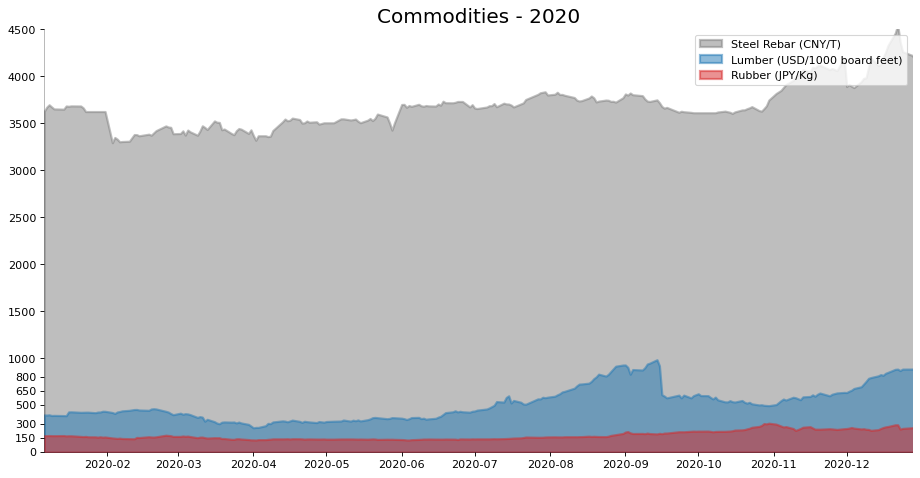

In [5]:
x = df.index.tolist()
y0 = df['Steel'].values.tolist()
y1 = df['Lumber'].values.tolist()
y2 = df['Rubber'].values.tolist()
mycolors = ['tab:red', 'tab:blue', 'tab:grey']      
columns = ['Rubber (JPY/Kg)', 'Lumber (USD/1000 board feet)', 'Steel Rebar (CNY/T)']

# Draw Plot 
fig, ax = plt.subplots(1, 1, figsize=(14,7), dpi= 80)
ax.fill_between(x, y1=y0, y2=0, label=columns[2], alpha=0.5, color=mycolors[2],linewidth=2)
ax.fill_between(x, y1=y1, y2=0, label=columns[1], alpha=0.5, color=mycolors[1], linewidth=2)
ax.fill_between(x, y1=y2, y2=0, label=columns[0], alpha=0.5, color=mycolors[0], linewidth=2)

# Decorations
ax.set_title('Commodities - 2020', fontsize=18)
ax.legend(loc='best', fontsize=10)

ax.set(ylim=[0, 4100])

plt.xlim(x[0], x[-3])
plt.yticks(list(plt.yticks()[0]) + [150, 300, 650, 800])
# Lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)
plt.show()